## Predicting heart disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on medical attribute

1. Problem defination
2. Data
3. Evaluation
4. Modelling
5. Experimentation

## 1. Problem Defination

**statement**
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learnign Repository https://archive.ics.uci.edu/dataset/45/heart+disease

Kaggle 
https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 90% accuracy at predicting whether or not a patient has heart disease during thr proof of concept, we will pursue the project

## 4. Features

**Data dictionary (for reference)**

1. **age** (age in years)
2. **sex** (1 = male; 0 = female)
3. **chest pain type** (4 values)
    *  0: Typical angina: chest pain related to decrease supply in blood
    *  1: Atypical angina: chest pain not related to heart
    *  2: Non-anginal pain: typically esophageal spasms (non heart related) 
    *  3: Asymptomatic: chest pain not showing sign of disease
4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. **chol** - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. **fasting blood sugar** > 120 mg/dl (1 = true; 0 = false)
7. **resting electrocardiographic results** (values 0,1,2)
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8.  **thalach** - maximum heart rate achieved
9.  **exang** - exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. **slope** - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heartthe slope of the peak exercise ST segment
12. **ca** - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. **thal**: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)

## 1. Preparing our tools
We will use pandas, Matplotlib, Numpy for data analysis and manipulation

In [1]:
# import all tools needed
    
# Regular EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay,ConfusionMatrixDisplay


## 2. Load data


In [4]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## 3. Data Exploration (EDA)

The goal here is to find out about more about the data and become a subject matter expert on dataset

1. What question are u trying to solve
2. What kind of data do we have and ho to treat different types
3. whats missing frm data, how to deal with it
4. Where are the outliers and why shuld u care about them
5. How can u add, change or remove features to get more out of ur data



In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# lets find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

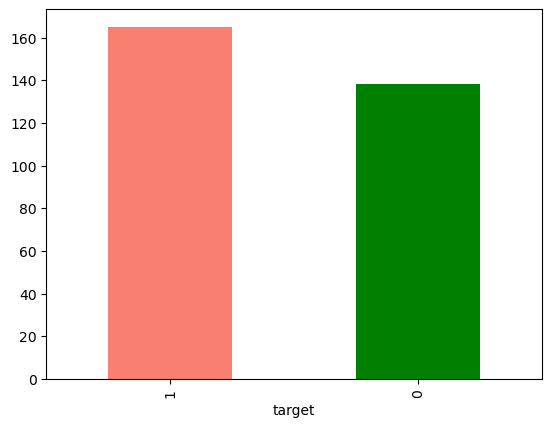

In [58]:
# TIP: for plotting data in scatter form can use third method..in bar form use first method

df["target"].value_counts().plot(kind="bar", color=["Salmon","green"]);


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 3.1 Comparing various columns with target

### 3.1.1. Gender vs Heart disease frequency

* Sex vs target
* Target vs sex

In [37]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

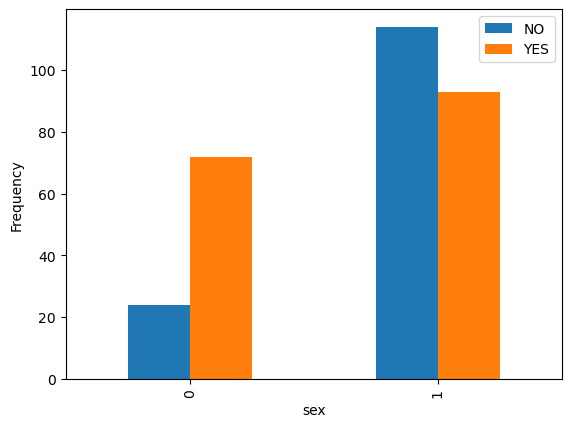

In [33]:
a=pd.crosstab(df["sex"],df["target"])
a.plot(kind="bar")
plt.ylabel("Frequency")
plt.legend(["NO","YES"])

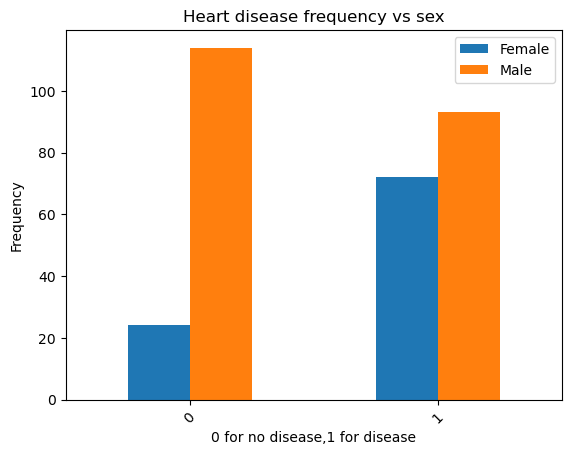

In [30]:
a=pd.crosstab(df["target"],df["sex"])
a.plot(kind="bar");
plt.title("Heart disease frequency vs sex")
plt.xlabel("0 for no disease,1 for disease")
plt.ylabel("Frequency")
plt.legend(["Female","Male"])
plt.xticks(rotation=45);

### 3.1.2. Age vs Max Heart Rate for Heart Disease

C:\Users\hp\AppData\Local\Temp\ipykernel_22304\1966581327.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


'\nCan do individually\nplt.figure(figsize=(10,6))\nplt.scatter(df.age[df.target==1],\n            df.thalach[df.target==1],\n            c="salmon"\n)\nplt.scatter(df.age[df.target==0],\n            df.thalach[df.target==0],\n            c="lightblue"\n)\n\n'

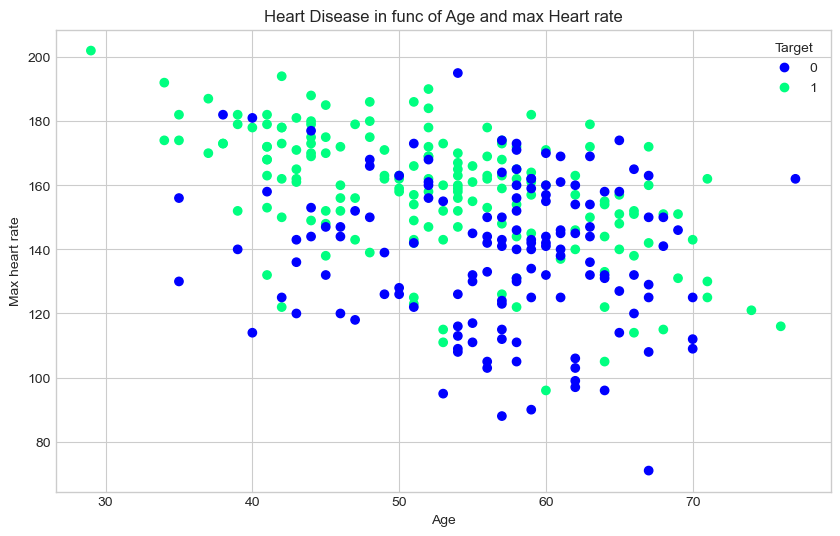

In [5]:
plt.style.use('seaborn-whitegrid')
fig,ax=plt.subplots(figsize=(10,6));
scatter=ax.scatter(x=df["age"],
                   y=df["thalach"],
                   c=df["target"],
                   cmap="winter");

ax.set(title="Heart Disease in func of Age and max Heart rate",
       xlabel="Age",
       ylabel="Max heart rate");

ax.legend(*scatter.legend_elements(),title="Target")

"""
Can do individually
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon"
)
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue"
)

"""

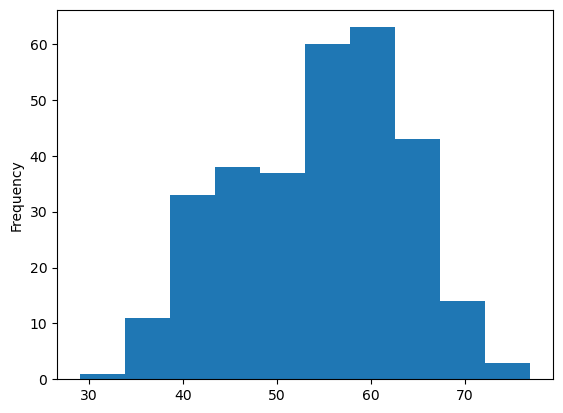

In [59]:
df.age.plot.hist();

### 3.1.3. Heart disease frequency vs Chest Pain Type

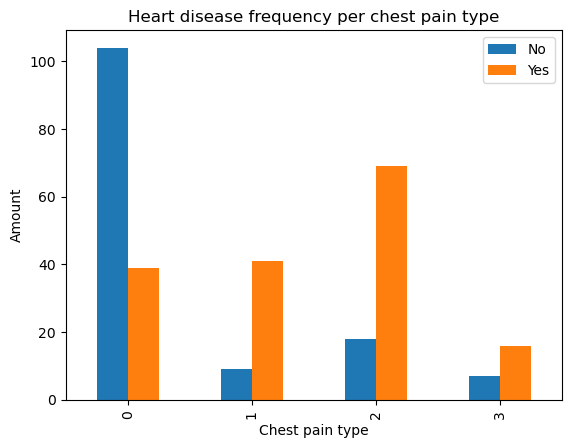

In [70]:
a=pd.crosstab(df["cp"],df["target"])
a.plot(kind="bar")
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No","Yes"])


### 3.1.4. Make a correlation matrix

In [80]:
df.corr()

# basically corr matix tells about how much correlated are the vairables with each other..
# if corr value>0 then if x increases then y increases
# if corr value<0 then if x increases then y decreases
# value is 1 for eg for perfect age vs age, sex vs sex,etc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


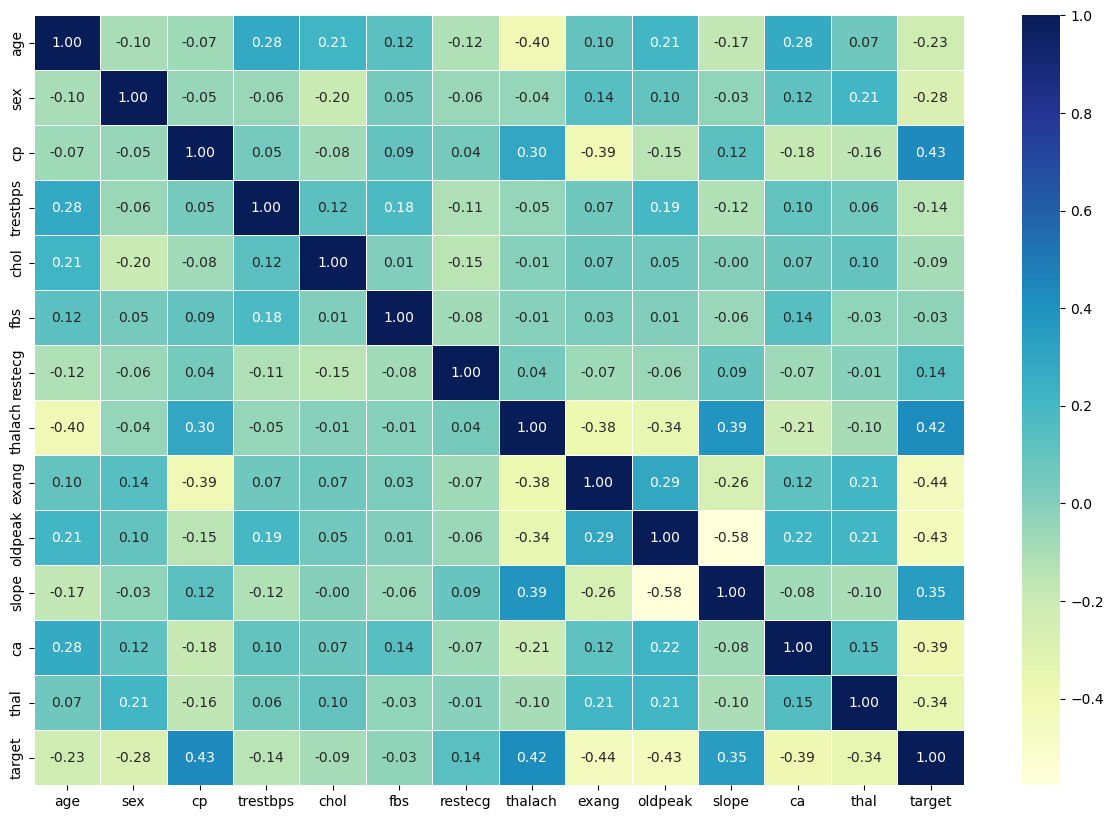

In [78]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="YlGnBu");


## 5. Modelling

### 5.1 Splitting data

In [5]:
# split data into x and y
x=df.drop("target",axis=1)
y=df["target"]

In [6]:
# split data into train and test sets
np.random.seed(42)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### 5.2 Choosing Our model

We will try 3 different ml models
1. Logistic regression
2. K-nearest Neigbours Classifier
3. Random Forest Classifier

In [5]:
# Put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

def fit_and_score(models, x_train,x_test,y_train,y_test):
    
    # set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores={}
    
    # Loop through models
    for name,model in models.items():
        # Fit the model tot he data
        model.fit(x_train,y_train)
        
        # evaluate and append its score in model score
        score=model.score(x_test,y_test)
        model_scores[name]=score
        
    return model_scores
        
    

In [6]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

D:\HERE\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### 5.3 Model Comparision

<Axes: >

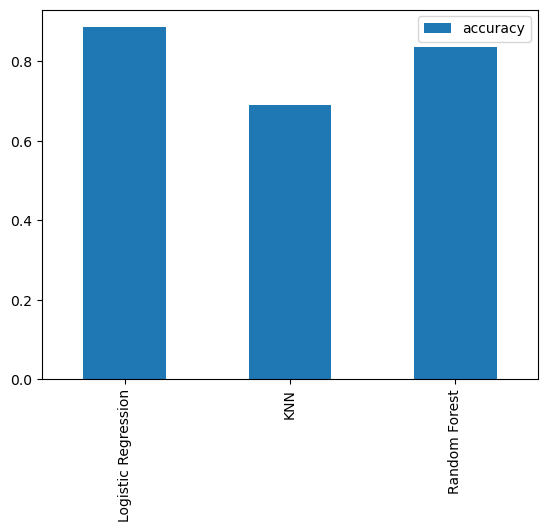

In [96]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot(kind="bar")
# model_compare.plot(kind="bar")

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* precision
* recall
* F1 score
* classification report
* ROC curve
* AUC

### 5.4 HyperParameter Tuning

#### 5.4.1 KNN parameters Tuning

In [7]:
# KNN

training_scores=[]
test_scores=[]

# list of different values for n_neighbours
neighbours=range(1,21)

knn=KNeighborsClassifier()

# Looping
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    
    # Update training score list
    training_scores.append(knn.score(x_train,y_train))
    
    # Update the test score list
    test_scores.append(knn.score(x_test,y_test))
    
np.max(test_scores)


0.7540983606557377

C:\Users\hp\AppData\Local\Temp\ipykernel_29484\1827766230.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


The maximum score is 75.41% and is achieved at n_neighbors= 11


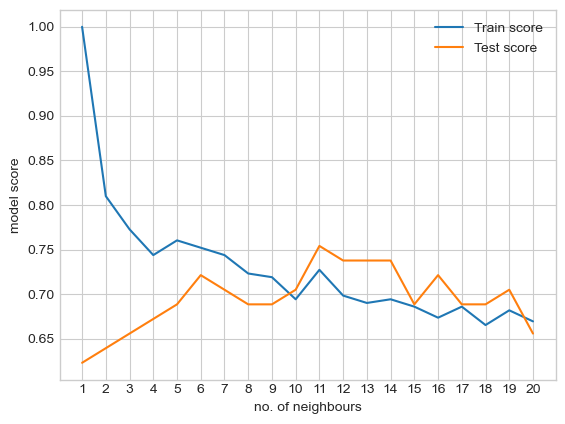

In [9]:
plt.style.use('seaborn-whitegrid')
plt.plot(neighbours,training_scores,label="Train score")
plt.plot(neighbours,test_scores,label="Test score")
plt.xlabel("no. of neighbours")
plt.ylabel("model score")
plt.xticks(np.arange(1,21,1)) # can manually show how many numbers we want on an axis
plt.legend()

print(f"The maximum score is {np.max(test_scores)*100:.2f}% and is achieved at n_neighbors= {np.argmax(test_scores)+1}")

#### 5.4.2 Logistic Regression Hyperparameter tuning
* Using RandomizedCV()

In [8]:
# y = logspace(a,b,n) generates n points between decades 10^a and 10^b 

np.random.seed(42)

log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

# setup RandomizedSearchCV
rs_log_reg= RandomizedSearchCV(estimator=LogisticRegression(),
                        param_distributions=log_reg_grid,
                        n_iter=20, # number of models to try (no. of combinations to try from grid)
                        cv=5, # cross validation also
                        verbose=True)

rs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [9]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [10]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

* GridSearchCV()

In [7]:
np.random.seed(42)

log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

gs_log_reg= GridSearchCV(estimator=LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5, # cross validation also
                        verbose=True)

# Fit
gs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [8]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [9]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

#### 5.4.3 Randomforest hyperparameter tuning 
* RandomizedSearchCV()

In [14]:
np.random.seed(42)

rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,5],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

rs_rf_clf=RandomizedSearchCV(estimator=RandomForestClassifier(),
                             param_distributions=rf_grid,
                             n_iter=30,
                             cv=5,
                             verbose=True)

rs_rf_clf.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 5],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [15]:
rs_rf_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [17]:
rs_rf_clf.score(x_test,y_test)

0.8688524590163934

## 6. Evaluation

* ROC,AUC
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

Can use CV where ever possible

### 6.1 ROC Curve

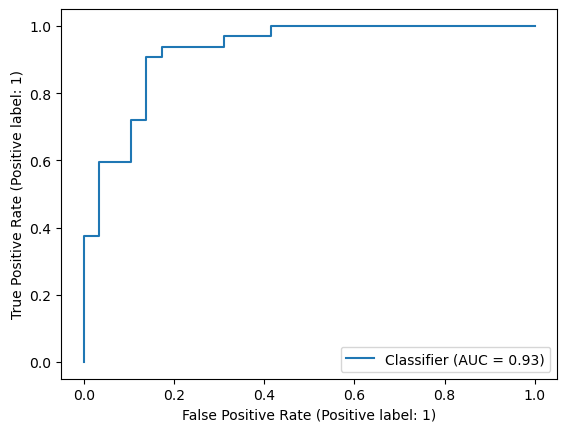

In [45]:
# Plot ROC and calculate AUC metric
y_pred = gs_log_reg.decision_function(x_test)
RocCurveDisplay.from_predictions(y_test, y_pred)

# mark AUC value shown in graph

### 6.2 Confusion Matrix

In [49]:
y_preds=gs_log_reg.predict(x_test)
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


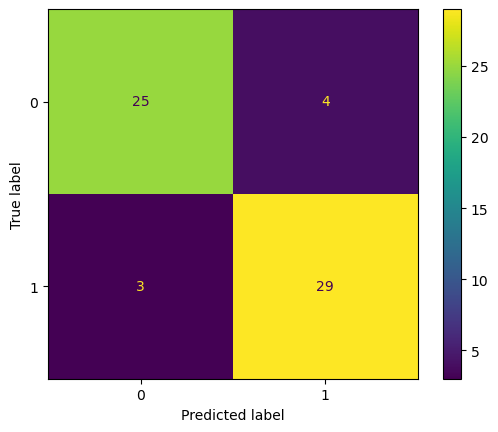

In [46]:
ConfusionMatrixDisplay.from_estimator(estimator=gs_log_reg,X=x_test,y=y_test)

In [ ]:
# 173

### 6.3 Classification Report

Mark these reports are not for cross validated model

In [50]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### 6.4 Evaluation metrics using cross-validation

In [51]:
# Check best hyperparameters
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
# create a new classification with best parameters
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [69]:
# cross validated accuracy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [70]:
# cross validated precision score
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [71]:
# cross validated recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [72]:
# cross validated f1-score
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: >

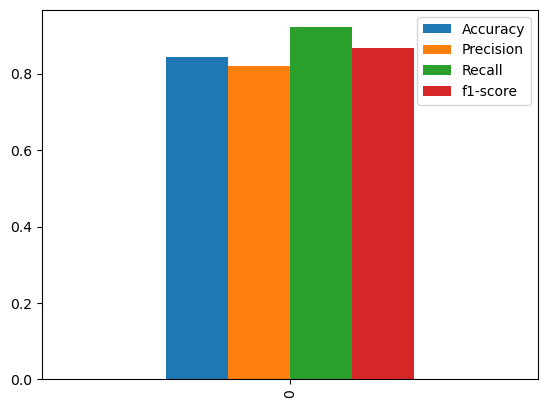

In [75]:
cv_metrics_graph=pd.DataFrame({"Accuracy":cv_acc,
                              "Precision":cv_precision,
                              "Recall":cv_recall,
                              "f1-score":cv_f1},
                              index=[0])

cv_metrics_graph.plot(kind="bar")

<Axes: title={'center': 'Cross validated classification metrics'}>

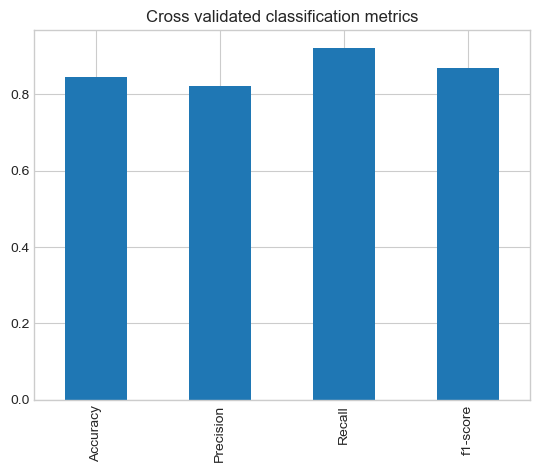

In [82]:
cv_metrics_graph.T.plot(kind="bar",
                        title="Cross validated classification metrics",
                        legend=False)

## 7. Feature importance

* Feature impotance tells about the feature which contributed the most to the outcome of the model and how did they contribute
* The method is different for each machine learning model

In [87]:
# Fit an instance in LogisticRegression
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(x_train,y_train);

In [91]:
# method 1: Check coeff
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

* Coef different from corr.. corr checks relation bw feature variables themselves..but coef checls relation bw feature and target variables
* Although both return +ve/-ve value having same meaning

In [92]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

<Axes: title={'center': 'Feature importance'}>

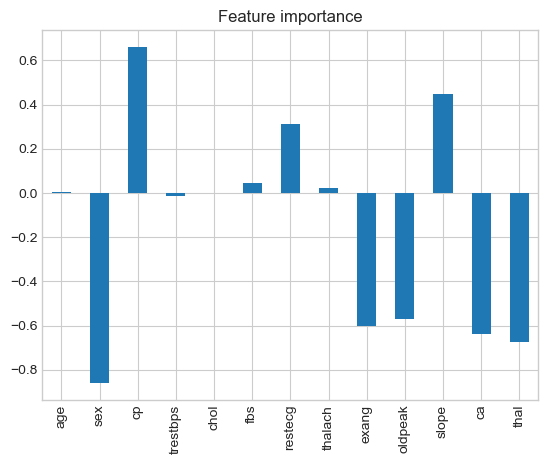

In [93]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False)

In [94]:
# Observation 

x=pd.crosstab(df.sex,df.target)
x

target,0,1
sex,,
0,24,72
1,114,93



* See how sex value increases (0-1) then ratio of increase in target variable decreases..

* like 72/24>93/114 (so (-ve) value)

* Exactly says as the sex value increases (from female to male) the ratio of people having and not having disease decreases.. like women hv more chance of heart diseease

* Also more the extreme value(+ve or -ve) more role in influencing the model

* see eg chol, trestbps etc not much role in making the model


In [11]:
## Saving the model

from joblib import dump,load

# save model to file
dump(gs_log_reg,filename="final_model.joblib")

['final_model.joblib']

In [12]:
# loaded

loaded_job_model=load(filename="final_model.joblib")
loaded_job_model.score(x_test,y_test)

0.8852459016393442

## 7. Experimentation ( for my notes)

If we couldnt hit the evaluation metrics
* Can we collect more data
* Can we try a better model (Like CatBoost or XGBoost)
* Could we improve the current model
